In [1]:
import json
from tqdm import tqdm

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('public_bicycle_2212.csv', encoding='cp949')
df = df.rename(columns={'대여 대여소번호': '대여대여소번호', '대여 대여소명': '대여대여소명'})
origin_df = df
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-44695,2022-12-01 00:00:10,1933,개봉푸르지오아파트 상가,0,2022-12-01 00:00:20,01933,개봉푸르지오아파트 상가,0,0,0.00,\N,M,내국인,ST-678,ST-678
1,SPB-31562,2022-12-01 00:00:04,3007,MBC 앞,0,2022-12-01 00:00:26,03007,MBC 앞,0,0,111.20,1995,F,내국인,ST-2165,ST-2165
2,SPB-56324,2022-12-01 00:01:33,4468,가락1동주민센터,0,2022-12-01 00:01:58,04468,가락1동주민센터,0,0,0.00,1994,M,내국인,ST-2583,ST-2583
3,SPB-30175,2022-12-01 00:03:02,652,답십리 래미안엘파인아파트 입구,0,2022-12-01 00:03:30,00652,답십리 래미안엘파인아파트 입구,0,0,0.00,1981,M,내국인,ST-1447,ST-1447
4,SPB-37639,2022-12-01 00:00:18,1047,강동 한신휴플러스,0,2022-12-01 00:03:55,01075,천동초교 삼거리,0,3,492.34,1989,M,내국인,ST-1369,ST-1836


## Preprocessing

In [3]:
def get_station_names(filename='station_names.json'):
    try:
        with open(filename) as f:
            station_names = json.load(f)
    except FileNotFoundError:
        station_names = dict()
        station_id_lt = pd.Series(np.concatenate([df['대여대여소ID'].unique(), df['반납대여소ID'].unique()], axis=0)).unique()
        for station_id in tqdm(station_id_lt):
            if station_id in df['대여대여소ID']:
                station_names[station_id] = df[df['대여대여소ID'] == station_id]['대여대여소명'].iloc[0]
            else:
                station_names[station_id] = df[df['반납대여소ID'] == station_id]['반납대여소명'].iloc[0]

        with open('station_names.json', 'w') as f:
            json.dump(station_names, f)
    
    return station_names

station_names = get_station_names()

In [4]:
df.dtypes

자전거번호       object
대여일시        object
대여대여소번호      int64
대여대여소명      object
대여거치대        int64
반납일시        object
반납대여소번호     object
반납대여소명      object
반납거치대       object
이용시간(분)      int64
이용거리(M)    float64
생년          object
성별          object
이용자종류       object
대여대여소ID     object
반납대여소ID     object
dtype: object

In [5]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df['이용시간(분)'] = pd.to_timedelta(df['이용시간(분)'], 'm')
df = df.drop(['대여대여소명', '반납대여소명', '대여대여소번호', '반납대여소번호'], axis=1)
df.head()

,자전거번호,대여일시,대여거치대,반납일시,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-44695,2022-12-01 00:00:10,0,2022-12-01 00:00:20,0,0 days 00:00:00,0.00,\N,M,내국인,ST-678,ST-678
1,SPB-31562,2022-12-01 00:00:04,0,2022-12-01 00:00:26,0,0 days 00:00:00,111.20,1995,F,내국인,ST-2165,ST-2165
2,SPB-56324,2022-12-01 00:01:33,0,2022-12-01 00:01:58,0,0 days 00:00:00,0.00,1994,M,내국인,ST-2583,ST-2583
3,SPB-30175,2022-12-01 00:03:02,0,2022-12-01 00:03:30,0,0 days 00:00:00,0.00,1981,M,내국인,ST-1447,ST-1447
4,SPB-37639,2022-12-01 00:00:18,0,2022-12-01 00:03:55,0,0 days 00:03:00,492.34,1989,M,내국인,ST-1369,ST-1836


In [6]:
df = df.replace({'\\N': np.nan})

In [7]:
df['생년'] = df['생년'].astype('Int64')
#df['반납대여소번호'] = df['반납대여소번호'].astype('Int64')
df['반납거치대'] = df['반납거치대'].astype('Int64')
#df['대여대여소번호'] = df['반납대여소번호'].astype('Int64')
df['대여거치대'] = df['반납거치대'].astype('Int64')

In [8]:
df.dtypes

자전거번호               object
대여일시        datetime64[ns]
대여거치대                Int64
반납일시        datetime64[ns]
반납거치대                Int64
이용시간(분)    timedelta64[ns]
이용거리(M)            float64
생년                   Int64
성별                  object
이용자종류               object
대여대여소ID             object
반납대여소ID             object
dtype: object

In [9]:
first_elements = []
for col in df.columns:
    first_elements.append(df[col].unique()[0])

first_elements

['SPB-44695',
 numpy.datetime64('2022-12-01T00:00:10.000000000'),
 0,
 numpy.datetime64('2022-12-01T00:00:20.000000000'),
 0,
 numpy.timedelta64(0,'ns'),
 0.0,
 <NA>,
 'M',
 '내국인',
 'ST-678',
 'ST-678']

In [10]:
df['성별'] = df['성별'].replace({'m': 'M', 'f': 'F', '\\N': np.nan})
df['성별'].unique()

array(['M', 'F', nan], dtype=object)

In [11]:
df.isna().sum()

자전거번호           0
대여일시            0
대여거치대        7008
반납일시            0
반납거치대        7008
이용시간(분)         0
이용거리(M)         0
생년         135208
성별         583430
이용자종류           0
대여대여소ID         0
반납대여소ID      7008
dtype: int64

In [12]:
group = df.groupby('성별', dropna=False).describe().drop(
    [
        #'대여대여소번호', 
        '대여거치대', 
        '반납거치대', 
        #'반납대여소번호'
    ], 
    axis=1
)
group

이용시간(분)                                                        \
      count                       mean                        std   
성별                                                                  
F    425710  0 days 00:17:42.210283996  0 days 00:26:01.591568039   
M    806250  0 days 00:16:55.807032558  0 days 00:25:30.430437523   
NaN  583430  0 days 00:17:11.365887938  0 days 00:26:29.988526058   

                                                                         \
                 min              25%              50%              75%   
성별                                                                        
F    0 days 00:00:00  0 days 00:05:00  0 days 00:10:00  0 days 00:19:00   
M    0 days 00:00:00  0 days 00:05:00  0 days 00:09:00  0 days 00:18:00   
NaN  0 days 00:00:00  0 days 00:05:00  0 days 00:09:00  0 days 00:18:00   

                       이용거리(M)               ...                          생년  \
                 max     count         mean  ...     75%       max     count   
성별                                           ...                               
F    1 days 21:30:00  425710.0  1737.865427  ...  2050.0  93230.98  386638.0   
M    1 days 16:42:00  806250.0  1852.663139  ...  2140.0  57590.00  736805.0   
NaN  1 days 14:33:00  583430.0  1806.386897  ...  2090.0  87742.16  556739.0   

                                                                     
            mean        std     min     25%     50%     75%     max  
성별                                                                   
F    1988.057752  15.506041     0.0  1980.0  1991.0  1997.0  2099.0  
M    1986.314137  21.988855     0.0  1977.0  1989.0  1996.0  2099.0  
NaN  1987.045405  15.204496  1901.0  1980.0  1992.0  1997.0  2069.0  

[3 rows x 24 columns]

In [13]:
group['생년']

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
F,386638.0,1988.057752,15.506041,0.0,1980.0,1991.0,1997.0,2099.0
M,736805.0,1986.314137,21.988855,0.0,1977.0,1989.0,1996.0,2099.0
NaN,556739.0,1987.045405,15.204496,1901.0,1980.0,1992.0,1997.0,2069.0


In [14]:
group['이용거리(M)']

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
F,425710.0,1737.865427,2014.346012,0.0,714.58,1190.000,2050.0,93230.98
M,806250.0,1852.663139,2213.190466,0.0,740.00,1233.955,2140.0,57590.00
NaN,583430.0,1806.386897,2148.458372,0.0,730.00,1220.000,2090.0,87742.16


In [15]:
group['이용시간(분)']

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
F,425710,0 days 00:17:42.210283996,0 days 00:26:01.591568039,0 days 00:00:00,0 days 00:05:00,0 days 00:10:00,0 days 00:19:00,1 days 21:30:00
M,806250,0 days 00:16:55.807032558,0 days 00:25:30.430437523,0 days 00:00:00,0 days 00:05:00,0 days 00:09:00,0 days 00:18:00,1 days 16:42:00
NaN,583430,0 days 00:17:11.365887938,0 days 00:26:29.988526058,0 days 00:00:00,0 days 00:05:00,0 days 00:09:00,0 days 00:18:00,1 days 14:33:00


결측값이 어떤 카테고리와도 통계적 연관성이 존재하지 않음.

현재 목적은 모델 학습을 위한 데이터를 전처리하는 것이 아니라 통찰을 찾아내는 것이므로 `drop`함.

In [16]:
df = df.dropna(axis=0)
len(origin_df), len(df), 1 - len(df) / len(origin_df)

(1815390, 1119145, 0.38352365056544324)

대략 38% 데이터가 `drop`됨.

In [17]:
df.head()

,자전거번호,대여일시,대여거치대,반납일시,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
1,SPB-31562,2022-12-01 00:00:04,0,2022-12-01 00:00:26,0,0 days 00:00:00,111.20,1995,F,내국인,ST-2165,ST-2165
2,SPB-56324,2022-12-01 00:01:33,0,2022-12-01 00:01:58,0,0 days 00:00:00,0.00,1994,M,내국인,ST-2583,ST-2583
3,SPB-30175,2022-12-01 00:03:02,0,2022-12-01 00:03:30,0,0 days 00:00:00,0.00,1981,M,내국인,ST-1447,ST-1447
4,SPB-37639,2022-12-01 00:00:18,0,2022-12-01 00:03:55,0,0 days 00:03:00,492.34,1989,M,내국인,ST-1369,ST-1836
5,SPB-39909,2022-12-01 00:03:43,0,2022-12-01 00:03:56,0,0 days 00:00:00,0.00,1985,M,내국인,ST-2760,ST-2760


In [18]:
# 폰트 문제로 영어로 Column 명을 바꿈
df = df.rename(
    columns={
        '자전거번호': 'bicycle_id',
        '대여일시': 'rent_time',
        '반납일시': 'return_time',
        '대여거치대': 'rent_dock',
        '반납거치대': 'return_dock',
        '이용시간(분)': 'use_minutes',
        '이용거리(M)': 'move_dist',
        '생년': 'birth_year',
        '성별': 'gender',
        '이용자종류': 'user_type',
        '대여대여소ID': 'rent_station_id',
        '반납대여소ID': 'return_station_id'
    }
)

df['user_type'] = df['user_type'].replace({'내국인': 'local', '비회원': 'nonmember'})

df.head()

,bicycle_id,rent_time,rent_dock,return_time,return_dock,use_minutes,move_dist,birth_year,gender,user_type,rent_station_id,return_station_id
1,SPB-31562,2022-12-01 00:00:04,0,2022-12-01 00:00:26,0,0 days 00:00:00,111.20,1995,F,local,ST-2165,ST-2165
2,SPB-56324,2022-12-01 00:01:33,0,2022-12-01 00:01:58,0,0 days 00:00:00,0.00,1994,M,local,ST-2583,ST-2583
3,SPB-30175,2022-12-01 00:03:02,0,2022-12-01 00:03:30,0,0 days 00:00:00,0.00,1981,M,local,ST-1447,ST-1447
4,SPB-37639,2022-12-01 00:00:18,0,2022-12-01 00:03:55,0,0 days 00:03:00,492.34,1989,M,local,ST-1369,ST-1836
5,SPB-39909,2022-12-01 00:03:43,0,2022-12-01 00:03:56,0,0 days 00:00:00,0.00,1985,M,local,ST-2760,ST-2760


## EDA

### 각종 이용률 통계

In [19]:
df['rent_dock'].value_counts()

0     1097843
99      21302
Name: rent_dock, dtype: Int64

In [20]:
df['return_dock'].value_counts()

0     1097843
99      21302
Name: return_dock, dtype: Int64

<AxesSubplot: ylabel='Frequency'>

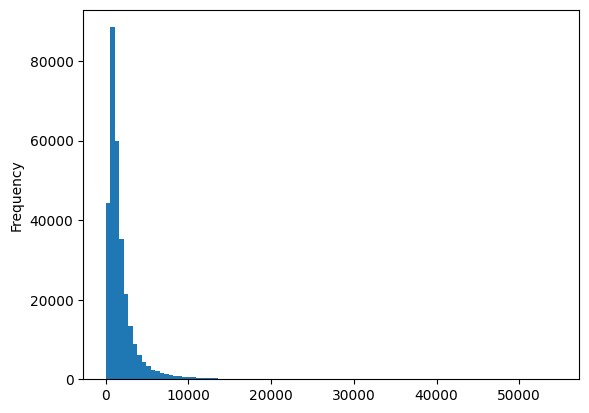

In [21]:
df['move_dist'].sample(300000).plot.hist(bins=100)

### 잘못 빌린 자전거

In [22]:
df[df['rent_station_id'] == df['return_station_id']]['use_minutes'].astype(int).describe()

count    1.029600e+05
mean     1.628893e+12
std      2.194852e+12
min      0.000000e+00
25%      0.000000e+00
50%      9.000000e+11
75%      2.580000e+12
max      1.186800e+14
Name: use_minutes, dtype: float64

<AxesSubplot: >

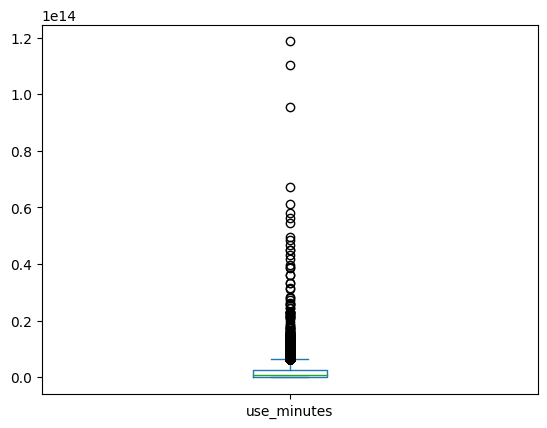

In [23]:
df[df['rent_station_id'] == df['return_station_id']]['use_minutes'].astype(int).plot.box()

<AxesSubplot: >

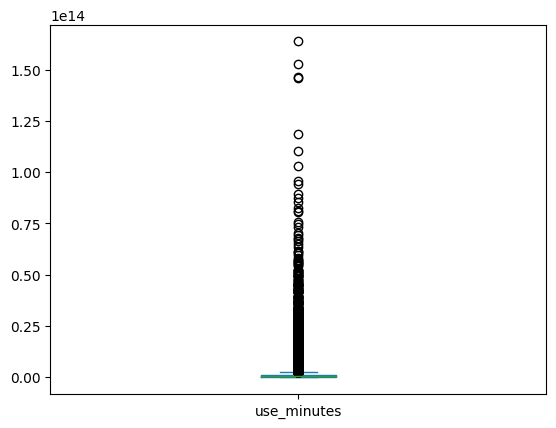

In [24]:
df['use_minutes'].astype(int).plot.box()

<AxesSubplot: ylabel='Frequency'>

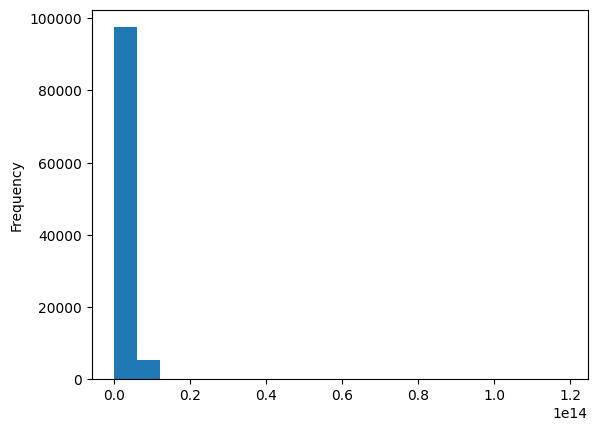

In [25]:
df[df['rent_station_id'] == df['return_station_id']]['use_minutes'].astype(int).plot.hist(bins=20)

In [26]:
miss_rent = (df['rent_station_id'] == df['return_station_id']) & (df['use_minutes'].astype(int) < 0.2)
miss_rent.sum() * 100 / len(df)

2.829660142340805

대략 2.8%의 사람들이 잘못 빌려감을 확인할 수 있음.

In [27]:
def ranking(index, groupby, top=10):
    ranks = df[index].groupby(groupby, as_index=False).count()[[groupby, 'bicycle_id']].sort_values('bicycle_id', ascending=False).head(top)
    ranks = ranks.rename(columns={'bicycle_id': 'count'})
    ranks = ranks.set_index(groupby)
    
    return ranks

def station_ranking(index, groupby, top=10):
    ranks = ranking(index, groupby, top)
    ranks['station_name'] = pd.Series(ranks.index, index=ranks.index).map(station_names)
    ranks = ranks[['station_name', 'count']]

    return ranks

In [28]:
station_ranking(miss_rent, 'rent_station_id')

,station_name,count
rent_station_id,,
ST-2031,마곡나루역 2번 출구,121
ST-1718,마곡나루역 5번출구 뒤편,117
ST-2045,마곡나루역 3번 출구,94
ST-668,구로디지털단지역 앞,84
ST-1065,"발산역 1번, 9번 인근 대여소",84
ST-702,봉림교 교통섬,83
ST-1731,오목교역 3번출구,79
ST-413,영등포구청역 1번출구,77
ST-891,롯데월드타워(잠실역2번출구 쪽),73


마곡나루역에 상당한 문제가 있음을 확인할 수 있음.

추가로, [마곡나루역의 지도](https://map.naver.com/v5/search/%EB%A7%88%EA%B3%A1%EB%82%98%EB%A3%A8%EC%97%AD?c=16.85,0,0,0,dh)에서 확인해보니 짧은 거리를 이동하는 경우, 역 인근 이동이 많을 수 있음을 확인함.

### 남자, 여자가 가장 많이 빌리는 지역

In [29]:
df.head()

,bicycle_id,rent_time,rent_dock,return_time,return_dock,use_minutes,move_dist,birth_year,gender,user_type,rent_station_id,return_station_id
1,SPB-31562,2022-12-01 00:00:04,0,2022-12-01 00:00:26,0,0 days 00:00:00,111.20,1995,F,local,ST-2165,ST-2165
2,SPB-56324,2022-12-01 00:01:33,0,2022-12-01 00:01:58,0,0 days 00:00:00,0.00,1994,M,local,ST-2583,ST-2583
3,SPB-30175,2022-12-01 00:03:02,0,2022-12-01 00:03:30,0,0 days 00:00:00,0.00,1981,M,local,ST-1447,ST-1447
4,SPB-37639,2022-12-01 00:00:18,0,2022-12-01 00:03:55,0,0 days 00:03:00,492.34,1989,M,local,ST-1369,ST-1836
5,SPB-39909,2022-12-01 00:03:43,0,2022-12-01 00:03:56,0,0 days 00:00:00,0.00,1985,M,local,ST-2760,ST-2760


In [30]:
station_ranking(df['gender'] == 'M', 'rent_station_id')

,station_name,count
rent_station_id,,
ST-2031,마곡나루역 2번 출구,3078
ST-1718,마곡나루역 5번출구 뒤편,2771
ST-2045,마곡나루역 3번 출구,2164
ST-668,구로디지털단지역 앞,1837
ST-1065,"발산역 1번, 9번 인근 대여소",1812
ST-891,롯데월드타워(잠실역2번출구 쪽),1803
ST-702,봉림교 교통섬,1712
ST-1546,신대방역 2번 출구,1625
ST-413,영등포구청역 1번출구,1596


In [31]:
station_ranking(df['gender'] == 'M', 'return_station_id')

,station_name,count
return_station_id,,
ST-2031,마곡나루역 2번 출구,3109
ST-1718,마곡나루역 5번출구 뒤편,2736
ST-2045,마곡나루역 3번 출구,2182
ST-1065,"발산역 1번, 9번 인근 대여소",1843
ST-668,구로디지털단지역 앞,1712
ST-702,봉림교 교통섬,1708
ST-413,영등포구청역 1번출구,1701
ST-891,롯데월드타워(잠실역2번출구 쪽),1663
ST-18,홍대입구역 2번출구 앞,1618


In [32]:
station_ranking(df['gender'] == 'F', 'rent_station_id')

,station_name,count
rent_station_id,,
ST-2031,마곡나루역 2번 출구,1980
ST-1718,마곡나루역 5번출구 뒤편,1500
ST-891,롯데월드타워(잠실역2번출구 쪽),1250
ST-1065,"발산역 1번, 9번 인근 대여소",1187
ST-413,영등포구청역 1번출구,1000
ST-2045,마곡나루역 3번 출구,993
ST-522,발산역 6번 출구 뒤,953
ST-1064,마곡역교차로,928
ST-1681,송파구청,928


In [33]:
station_ranking(df['gender'] == 'F', 'return_station_id')

,station_name,count
return_station_id,,
ST-2031,마곡나루역 2번 출구,1871
ST-1718,마곡나루역 5번출구 뒤편,1334
ST-891,롯데월드타워(잠실역2번출구 쪽),1308
ST-1065,"발산역 1번, 9번 인근 대여소",1140
ST-2045,마곡나루역 3번 출구,1084
ST-1681,송파구청,974
ST-522,발산역 6번 출구 뒤,959
ST-413,영등포구청역 1번출구,941
ST-99,뚝섬유원지역 1번출구 앞,927


이를 통해서 마곡나루역에서 빌리는 인구가 상당히 많음을 확인할 수 있음.

### 통행량

In [34]:
df['move_path'] = df['rent_station_id'].str.cat(df['return_station_id'], sep='->')

In [35]:
path_ranks = ranking(pd.Series([True for _ in range(len(df))], index=df.index), 'move_path')
path_ranks

,count
move_path,
ST-2965->ST-2871,471
ST-2268->ST-1298,438
ST-2871->ST-2965,395
ST-446->ST-506,388
ST-506->ST-106,385
ST-1681->ST-891,382
ST-479->ST-2264,367
ST-891->ST-1681,355
ST-2107->ST-1137,341


In [36]:
paths = pd.Series(path_ranks.index, index=path_ranks.index)
path_ranks = pd.concat(
    [
        path_ranks,
        pd.DataFrame(paths.str.split('->').to_list(), columns=['depart', 'arrival'], index=path_ranks.index)
    ],
    axis=1
)
path_ranks['depart'] = path_ranks['depart'].map(station_names)
path_ranks['arrival'] = path_ranks['arrival'].map(station_names)

In [37]:
path_ranks

,count,depart,arrival
move_path,,,
ST-2965->ST-2871,471,마곡13단지힐스테이트마스터 후문(1320동 앞),마곡역 7번출구
ST-2268->ST-1298,438,서울축산농협(장안지점),장한평역 1번출구
ST-2871->ST-2965,395,마곡역 7번출구,마곡13단지힐스테이트마스터 후문(1320동 앞)
ST-446->ST-506,388,성수2가1동 공영주차장 인근,성수역3번출구
ST-506->ST-106,385,성수역3번출구,이마트 버스정류소 옆
ST-1681->ST-891,382,송파구청,롯데월드타워(잠실역2번출구 쪽)
ST-479->ST-2264,367,역촌파출소,응암역2번출구 국민은행 앞
ST-891->ST-1681,355,롯데월드타워(잠실역2번출구 쪽),송파구청
ST-2107->ST-1137,341,북한산 한신휴플러스APT앞,창동역 2번출구


In [38]:
#df['place'] = origin_df['']